# Box Plots
<div style="text-align: right"> Fundamentals of Data Analysis</div>
<div style="text-align: right"> Shane Healy, DEC-2018</div>

# History of the Box Plot

Box plots were introduced by John Tukey in 1969. John Tukey was a pioneer of computer science, worked in Bell Labs and was a Professor in Princeton University <sup>[1](https://en.wikipedia.org/wiki/Box_plot)</sup>. 

His book, Exploratory Data Analysis, published in 1977, made the data visualisation technique of box plots popular. Tukey’s starting point for box plots was the range-bar, introduced in the 1950's. He added appropriate summary statistics that worked for a wide range of data. The modern view of a box plot was referred by Tukey as a schematic plot i.e. a box and whiskers plot with some special restrictions on the summary statistics used <sup>[2](http://vita.had.co.nz/papers/boxplots.pdf)</sup>.

The idea of showing median and quartiles as basic summaries pre-dates Tukey and were used by geographers as dispersion diagrams from the late 1930's on. Range bars and whiskers were also in use prior to Tukey. Tukey's version of box plots was original because of the criteria for identifying points in the tails, i.e. outliers, to be plotted separately and identified as deserving detailed consideration <sup>[3](https://stats.stackexchange.com/questions/369393/whats-the-history-of-box-plots-and-how-did-the-box-and-whiskers-design-evolv)</sup>.




In [1]:
# Import the required packages that will be used in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Description of Box Plots

Box plots are a compact and efficient way to visualise the distribution, variability and dispersion of data. Box plots <sup>[4](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm)</sup> do not display a distribution in as much detail as a histogram but shows if data is skewed or if there are outliers present. 

Box plots are useful for exploring data when a large number of observations are present and / or multiple data sets are being compared. 

Box plots use 5 numbers to define a data set:
* The minimum
* First quartile
* Median
* Third quartile
* Maximum.

A diagram on how to read a box plot <sup>[5](http://visualoop.com/blog/32470/a-look-at-box-plots)</sup> is shown below.

![Reading Box Plot](http://visualoop.com/media/2015/04/box_plot_anatomy.png)


## Terminology for Box Plots

### Median
The median is the middle value in data set. In a box plot, the median is displayed as a vertical line inside the box. The median differs from the mean or average as shown printed from below example.

In [2]:
y = (1,4,9,16,25)
print("For y data set,",y,", the median and mean are",np.median(y),"and",np.mean(y))

For y data set, (1, 4, 9, 16, 25) , the median and mean are 9.0 and 11.0


### Quartile
To divide a data set or list of numbers into quarters or quartiles, three distinguishing points are required. These points are at 1/4, 1/2 and 3/4 way through the data set. Dividing the data into quarters implies that a certain data set size is required i.e. it would be meaningless to calculate the quartiles of two data points.


### Percentile
A percentile indicates the value below which a given percentage of observations in a group of observations fall <sup>[6](https://en.wikipedia.org/wiki/Percentile)</sup>.  

### Lower Quartile / 25th Percentile / First Quartile / Q1
The first quartile is the middle number between the smallest number, lower extreme in above diagram, and the median of the dataset <sup>[7](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)</sup>.




### Upper Quartile / 75th Percentile / Third Quartile / Q3
The third quartile is the middle value between the median and the highest value, upper extreme in above diagram, of the dataset. <sup>[7](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)</sup>.

### Interquartile Range / IQR
The interquartile range is the range where fifty percent of the data points reside. In a box plot, the IQR is the generated box with the median lying inside. The IQR is calculated by subtracting the First Quartile from the Third Quartile(Q3-Q1) <sup>[8](https://en.wikipedia.org/wiki/Interquartile_range)</sup>. 




### Whisker
The whisker in a box plot begins at the first or third quartile and reaches out to terminate at a point that is defined by the user. The reach of the whisker is a function of the Interquartile Range, IQR. The default for many software applications including the Python matplotlib.pyplot package is IQR X 1.5.  


The upper whisker will reach to Q3 + (1.5 X IQR) and the lower whisker will reach to Q1 - (1.5 X IQR)

The default of 1.5 can be changed as required, for example if it desired that the whiskers would include the absolute max and min data values of data set. 



### Outliers
An outlier is a data point that is outside of the quartiles and outside of the whisker reach. Outliers in data sets should be investigated and understood.

# Displaying Distributions in Box Plots
In this section, data will be generated to compare the different appearance of box plots depending on whether the data is a:
* Uniform Distribution
* Normal Distribution
* Skewed Distribution

From the generated data, box plots will be created and summary statistics provided from a Pandas DataFrame.

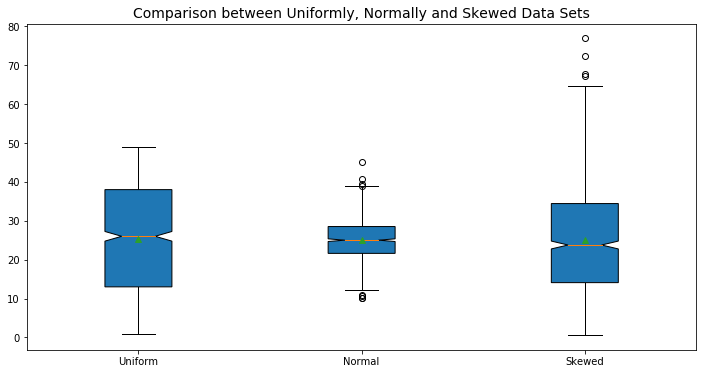

In [3]:
# Defining seed for reproducibility
np.random.seed(seed=50)

# Create an array to hold randomly generated uniform, normal and skewed data sets of size 1000 each
x = [np.random.randint(1,50,1000),np.random.normal(loc=25,scale=5, size = 1000), np.random.beta(2,6,1000)*102]

# Increase figure size
plt.figure(figsize=(12,6))

# Generate box plot with labels; patch_artist improves visual disply.
# The notched display represent the confidence interval around the median.
plt.boxplot(x,labels = ("Uniform","Normal","Skewed"),patch_artist= True, showmeans= True, notch=True);

plt.title("Comparison between Uniformly, Normally and Skewed Data Sets", size=14);

In [4]:
# Defining seed for reproducibility between box plot and DataFrame
np.random.seed(seed=50)

# Generate Pandas Dataframe of box plot components
df = pd.DataFrame({"Uniform": np.random.randint(1,50,1000),"Normal" : np.random.normal(loc=25,scale=5, size = 1000), "Skewed" : np.random.beta(2,6,1000)*102})

# Generate summary statistics of DataFrame
df.describe()

,Uniform,Normal,Skewed
count,1000.000000,1000.000000,1000.000000
mean,25.349000,25.135918,25.123597
std,14.579498,5.121030,14.179363
min,1.000000,10.222855,0.627462
25%,13.000000,21.611064,14.087482
50%,26.000000,25.003027,23.761410
75%,38.000000,28.509419,34.415751
max,49.000000,45.076372,76.868347


### Uniform
The uniform distribution displays the data broken into four similarly sized sections. There are no outliers and large variability or spread with standard deviation of 14. 

### Normal
The normal distribution displays little variability with a standard deviation of 5. This results in a smaller IQR and hence smaller box drawn.

### Skewed
The skewed distribution has similar summary statistics to the uniform distribution, apart from the MAX value. The standard deviation, is the same as the uniform example with a value of 14. The box plot shows the distribution is skewed to the right i.e. greater number of lower values with a stretching tail of higher values. 

# Use of Box Plots

As a hypothetical example of where box plots could be used, data will be generated to represent times for operations in a coffee shop. Scenario is that 100 customers pass through a coffee shop in an hour. The owner of the coffee shop simulates times, based on prior experience and knowledge, for below operations. The owner's objective is to assess the efficiency of the coffee shop. 

* Customer waiting
* Staff taking orders for coffee and food
* Staff preparing food order
* Staff preparing coffee order
* Serving the customer
* Staff tidying and cleaning the work area

In [5]:
# waiting simulates the time customers waited before service, uniformly distributed between 3 and 8 minutes.
waiting = np.random.randint(3,8,100)

In [6]:
# order simulates the time for customers order to be taken, uniformly distributed between 1 and 6 minutes. 
order = np.random.randint(1,6,100)

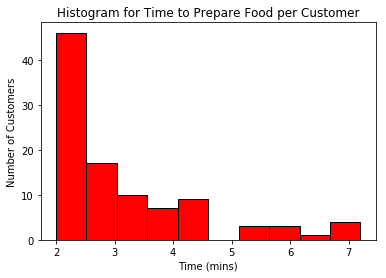

In [7]:
# prep_food simulates the time for staff to prepare customers food. A normal distrubution is used with the values squared.
# An offset of 2 is given as this simulates the minimum time of 2 minutes required to prepare food.

prep_food = (np.random.randn(100))**2+2

# Plot histogram to visualise results
plt.title("Histogram for Time to Prepare Food per Customer")
plt.xlabel("Time (mins)")
plt.ylabel("Number of Customers")
plt.hist(prep_food, color="red",edgecolor="black");

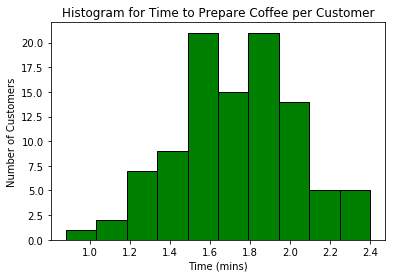

In [8]:
# prep_coffee simulates the time for staff to prepare a coffee.
# Values are drawn from a normal distribution around a mean of 1.7 minutes and standard deviation of 0.3 minutes. 

prep_coffee = np.random.normal(loc=1.7,scale=0.3, size = 100)

# Plot histogram to visualise results
plt.title("Histogram for Time to Prepare Coffee per Customer")
plt.xlabel("Time (mins)")
plt.ylabel("Number of Customers")
plt.hist(prep_coffee, color="green",edgecolor="black");

In [9]:
# serve simulates the time for staff to serve coffee or food to customers, uniformly distributed between 1 and 6 minutes.
serve = np.random.randint(1,6,100)

Over an hour, all staff spend a total of 20 minutes cleaning.
The median time for cleaning per customer is 0 minutes.
The max time for cleaning per customer is 8 minutes.


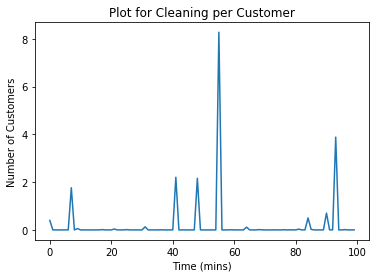

In [10]:
# Defining seed for reproducibility
np.random.seed(seed=25)

# cleaning simulates the staff time to clean work area as orders are processed.
# A beta function was chosen as generally no clean up is required, however there are sporadic requirements for it.
cleaning = (np.random.beta(0.04,5,100))*40

# Plot to visualise results
plt.plot(cleaning)
plt.title("Plot for Cleaning per Customer")
plt.xlabel("Time (mins)")
plt.ylabel("Number of Customers")

# Print out sum, median and max values of array cleaning.
print("Over an hour, all staff spend a total of%3.0f"% np.sum(cleaning),"minutes cleaning.")
print("The median time for cleaning per customer is%2.0f"% np.median(cleaning),"minutes.")
print("The max time for cleaning per customer is%2.0f"% np.max(cleaning),"minutes.")



In [11]:
# Generate an array, assess, to hold the data set simulating times for operations in the coffee shop
assess = [waiting, order, prep_food, prep_coffee, serve, cleaning]

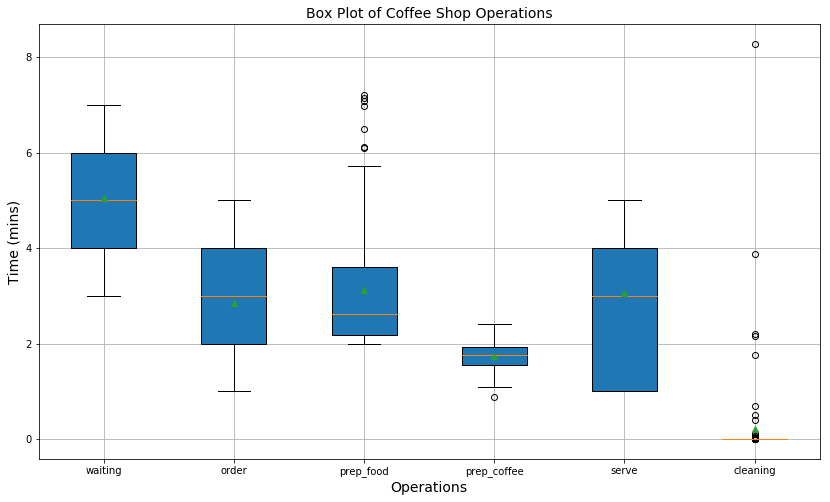

In [12]:
# Define the figure size of plot
plt.figure(figsize=(14,8))

# Generate a box plot with labels, mean values displayed with green triangle.
plt.boxplot(assess,labels = ("waiting", "order", "prep_food", "prep_coffee", "serve", "cleaning"),patch_artist= True, showmeans= True);

# Detail plot title, axis titles and show grid
plt.title("Box Plot of Coffee Shop Operations", size=14)
plt.xlabel("Operations", size=14)
plt.ylabel("Time (mins)", size=14)
plt.grid(True)

plt.show()

## Discussion of Box Plot of Coffee Shop Operations

* The times for **waiting**, **order** and **serve** are uniformly distributed. They contain no outliers but there is large variability. The coffee shop owner may want to identify factors that generate the variability and define staff procedures to standardize the tasks. The factors that cause waiting time for customers should be assessed.
* The times for **prep_food** have low variability with a median close to the minimum. However, the distribution is skewed to the right, positively skewed, with may outliers. The owner may want to identify which food preparations result in extended times and remove those items from the menu. This would remove variation. 
* The times for **prep_coffee** have little variation, no skew and few outliers. This is the most efficient operation in the coffee shop. 
* The median time for **cleaning** is zero minutes per customer. However, there are numerous large value outliers. The coffee shop owner could review reasons for the sporadic cleaning requirements and re-organize the workplace layout or allocate a member of staff to spend 20 minutes per hour cleaning the area. 
* The overall objective for the coffee shop owner is to remove variation and non-value add activities. With variation removed, a takt time per customer can be defined, workload for staff can be level loaded and efficiency of coffee shop operation improved.

# Alternatives to Box Plots

To demonstrate the alternatives to box plots the data for **prep_food** and variables from previous coffee shop example data will be used.

The alternatives to be assessed are:
* Histogram
* Scatter Plot
* Violin Plot
* Density Plot

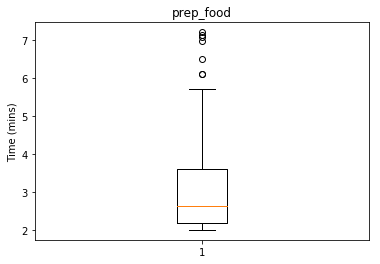

In [13]:
# Display the box plot for prep_food
plt.boxplot(prep_food);
plt.title("prep_food")
plt.ylabel("Time (mins)");

## Histogram
Histograms display the shape and distribution of data to a greater extent than box plots.

The number of bins can be defined for display.

Histograms will provide the number of data points that sit in a particular bin.

Histograms do not contain info on the median or outliers.

In the below plot, a histogram will be generated to display the same data as prep_food. The median will be added as an extra line on the plot.

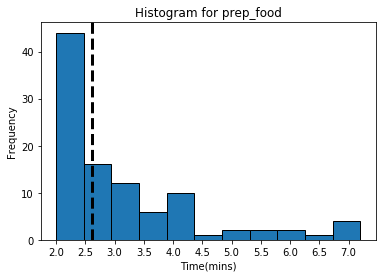

In [14]:
# Generate a histogram for prep_food data.
plt.hist(prep_food, edgecolor="black",bins=11);
plt.xticks(np.arange(2, 7.5, step=0.5))
plt.title("Histogram for prep_food")
plt.xlabel("Time(mins)")
plt.ylabel("Frequency")

# The median is inserted as an additional line. 
plt.axvline(np.median(prep_food), color='k', linestyle='dashed', linewidth=3);

## Scatter Plot
Scatter plots show the dispersion of data points. They are generally used to determine if there is a correlation between two variables. By adding a baseline such as the median, it demonstrates the scale of variability from that baseline. For large data sets, they are an unsuitable and uninformative method of displaying data compared to box plots.

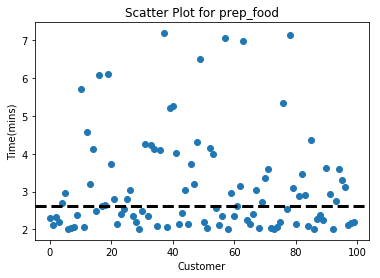

In [15]:
# Create an array to hold x values for scatter plot, 100 customers.
x = np.arange(0,100,1)

# Generate a scatter plot for prep_food
plt.scatter(x,prep_food)
plt.title("Scatter Plot for prep_food")
plt.xlabel("Customer")
plt.ylabel("Time(mins)")

# The median is inserted as an additional line. 
plt.axhline(np.median(prep_food), color='k', linestyle='dashed', linewidth=3);


## Violin Plots
Violin plots are similar to box plots and histograms. They show a representation of the of the probability distribution of the sample. Rather than showing counts of data points that fall into bins or order statistics, violin plots use kernel density estimation (KDE) to compute an empirical distribution of the sample <sup>[9](https://matplotlib.org/gallery/statistics/violinplot.html)</sup>.

Violin plots display the minimum, maximum, median and distribution of the data. The width of the shape / shading around the *violin* is indicative of the distribution type. A box can be added to violin plots to show the interquartile range. Violin plots would appear to convey more visually pertinent information than a box plot.

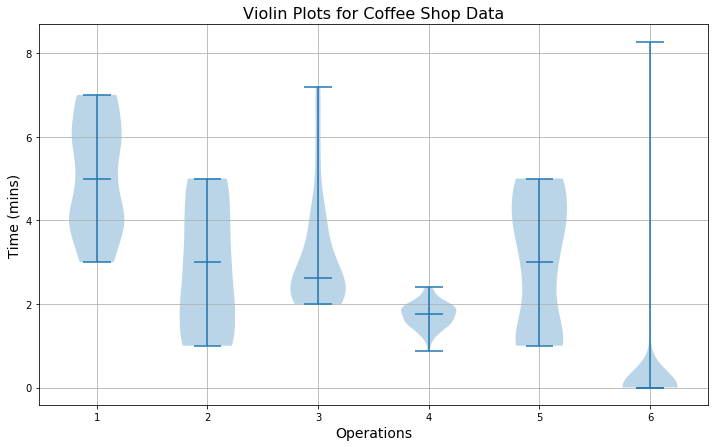

In [16]:
# Define the figure size of plot
plt.figure(figsize=(12,7))

# Generate violin plots to display data generated in coffee shop example
plt.violinplot(assess, showmedians=True)

# Add details to plot
plt.title("Violin Plots for Coffee Shop Data", size=16)
plt.xlabel("Operations", size=14)
plt.ylabel("Time (mins)", size=14)
plt.grid(True)

## Density Plot
A density plot is a smoothed version of a histogram. In kernel density estimation, KDE, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation <sup>[10](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)</sup>.

If plotting multiple variables, multiple histograms will clutter the display. Density plots allow for an uncluttered display and allow for comparison between different data sets or distributions.

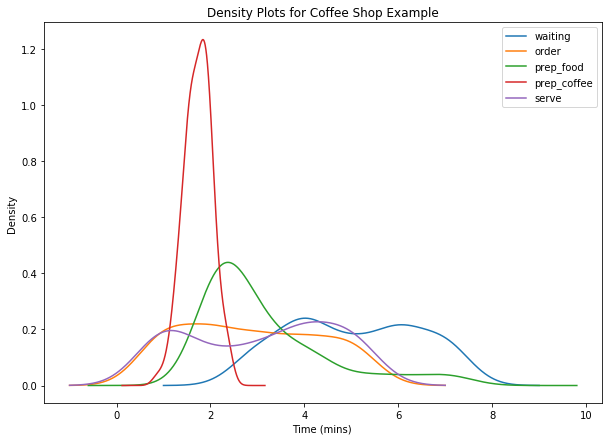

In [17]:
# Pandas, built on top of matplotlib, is used to generate kernal density plots of coffee shop example variables apart from cleaning.
# A DataFrame is created to hold variables for plotting.
df = pd.DataFrame({"waiting": waiting, "order":order, "prep_food":prep_food, "prep_coffee":prep_coffee, "serve":serve})

# Plot kind defined as kde, Kernel Density Estimation
# y-axis can exceed 1 as it is a probability density and not a probability.
T = pd.DataFrame(df).plot(kind='kde', title="Density Plots for Coffee Shop Example", legend=True, figsize=(10,7));

# Specifying X-Axis Label
T.set_xlabel("Time (mins) ");

# References

1. Wikipedia, Box Plot, https://en.wikipedia.org/wiki/Box_plot
2. 40 Years of Boxplots, Hadley Wickham and Lisa Stryjewski, http://vita.had.co.nz/papers/boxplots.pdf
3. StackExchange, History of Boxplots, https://stats.stackexchange.com/questions/369393/whats-the-history-of-box-plots-and-how-did-the-box-and-whiskers-design-evolv
4. Statistics Canada, Constructing box and whisker plots,https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm
5. Visualoop, http://visualoop.com/blog/32470/a-look-at-box-plots
6. Wikipedia, Percentile, https://en.wikipedia.org/wiki/Percentile
7. Understanding Boxplots, https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
8. Wikipedia, Interquartile Range, https://en.wikipedia.org/wiki/Interquartile_range
9. Matplotlib Documentation for Violin Plots, https://matplotlib.org/gallery/statistics/violinplot.html
10. Histograms and Density Plots in Python, https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
